## Частина друга: Аналіз файлів

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

* Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [2]:
file_data = pd.read_csv("2017_jun_final.csv")

* Прочитайте отриману таблицю, використовуючи метод head

In [3]:
file_data.head(2)

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA


* Визначте розмір таблиці за допомогою методу shape

In [4]:
print(f"Result: {file_data.shape[0]} rows x {file_data.shape[1]} columns")

Result: 8704 rows x 25 columns


* Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [5]:
file_data.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

* Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [6]:
file_data.isnull().sum(axis=0)/len(file_data)*100  # in %

N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Специализация                       82.938879
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.113051
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   2.562040
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

* Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [7]:
cols_for_delete = [idx for idx, val in enumerate(file_data.isnull().sum(axis=0)) if val > 0 if idx != 2]
file_data.drop(file_data.columns[cols_for_delete], axis= 1, inplace= True)

* Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [8]:
# Вибачте, тут вже просто кількість
file_data.isnull().sum(axis=0)

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

* Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
* Визначте новий розмір таблиці за допомогою методу shape

In [9]:
file_data.dropna(inplace= True)
print(f"Result: {file_data.shape[0]} rows x {file_data.shape[1]} columns")

Result: 4854 rows x 20 columns


* Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [10]:
python_data = file_data.loc[file_data['Язык.программирования'] == 'Python']
python_data.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


* Визначте розмір таблиці python_data за допомогою методу shape

In [11]:
print(f"Result: {python_data.shape[0]} rows x {python_data.shape[1]} columns")

Result: 207 rows x 20 columns


* Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [12]:
groupby_job_title = python_data.groupby(by="Должность")
print(type(groupby_job_title))
print(f"\n{np.sort(python_data['Должность'].unique())}\n")    

for item in groupby_job_title:
    print(item[0])

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>

['Junior Software Engineer' 'Senior Software Engineer' 'Software Engineer'
 'System Architect' 'Technical Lead']

Junior Software Engineer
Senior Software Engineer
Software Engineer
System Architect
Technical Lead


* Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [13]:
agg_data = groupby_job_title.agg({"Зарплата.в.месяц": ["min", "max"]})
agg_data

Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200

* Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [14]:
def fill_avg_salary(salary):
    return salary.mean()

agg_data["avg"] = agg_data.apply(fill_avg_salary, axis=1)

# щоб не було кривих заголовків стовпців
agg_data = agg_data.reset_index()  
agg_data.columns = ["Посада", "Мін.зпт", "Макс.зпт", "Середня.зпт"]
agg_data

,Посада,Мін.зпт,Макс.зпт,Середня.зпт
0,Junior Software Engineer,100,1250,675.0
1,Senior Software Engineer,1300,9200,5250.0
2,Software Engineer,500,5400,2950.0
3,System Architect,3000,5000,4000.0
4,Technical Lead,1425,6200,3812.5


* Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [15]:
agg_data["Середня.зпт"].describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: Середня.зпт, dtype: float64

* Збережіть отриману таблицю в CSV файл

In [16]:
# тут можливо потрібно було збрегти табличку з describe, але вже не буду переписувати 
agg_data.to_csv("agg_data.csv", index=False, encoding="utf-8-sig")
test_writing = pd.read_csv("agg_data.csv")
test_writing

,Посада,Мін.зпт,Макс.зпт,Середня.зпт
0,Junior Software Engineer,100,1250,675.0
1,Senior Software Engineer,1300,9200,5250.0
2,Software Engineer,500,5400,2950.0
3,System Architect,3000,5000,4000.0
4,Technical Lead,1425,6200,3812.5


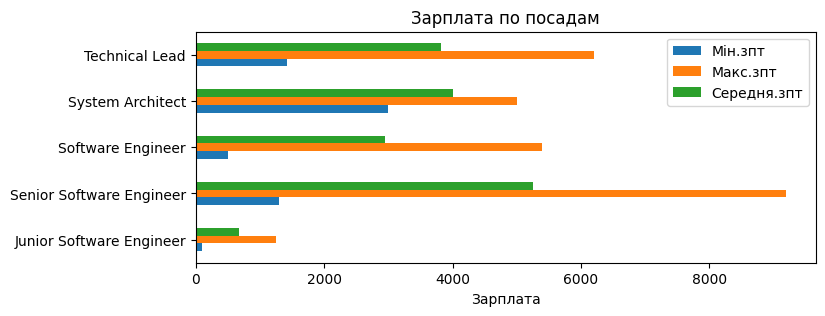

In [17]:
plot_data1 = agg_data.set_index("Посада").copy()
fig, ax = plt.subplots(figsize=(8, 3))
plot_data1.plot(kind="barh", ax=ax)
ax.set_title("Зарплата по посадам")
ax.set_ylabel("")
ax.set_xlabel("Зарплата");

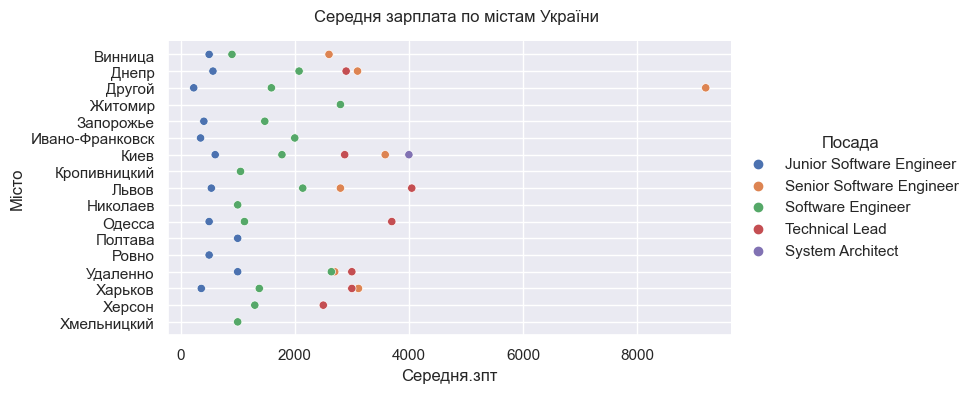

In [18]:
plot_data2 = python_data.groupby(by=["Город", "Должность"]).agg({"Зарплата.в.месяц": ["mean"]})
plot_data2 = plot_data2.reset_index()  
plot_data2.columns = ["Місто", "Посада", "Середня.зпт"]
sns.set_theme()
g = sns.relplot(
    data=plot_data2, y="Місто", x="Середня.зпт",
    hue="Посада", height=4, aspect=8/4,
)
g.fig.suptitle("Середня зарплата по містам України", fontsize=12)
g.fig.subplots_adjust(top=0.9);

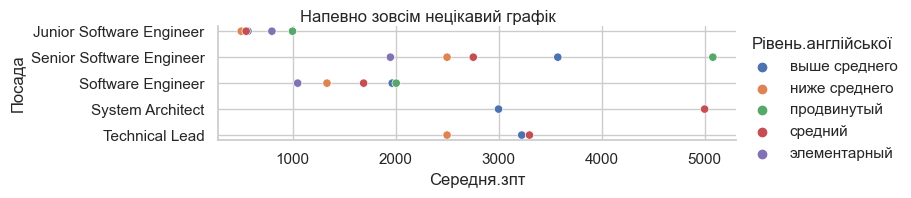

In [19]:
plot_data3 = python_data.groupby(by=["Уровень.английского", "Должность"]).agg({"Зарплата.в.месяц": ["mean"]})
plot_data3 = plot_data3.reset_index()  
plot_data3.columns = ["Рівень.англійської", "Посада", "Середня.зпт"]
sns.set_style("whitegrid")
g = sns.relplot(
    data=plot_data3, y="Посада", x="Середня.зпт",
    hue="Рівень.англійської", height=2, aspect=4,
)
g.fig.suptitle("Напевно зовсім нецікавий графік", fontsize=12)
g.fig.subplots_adjust(top=0.9);


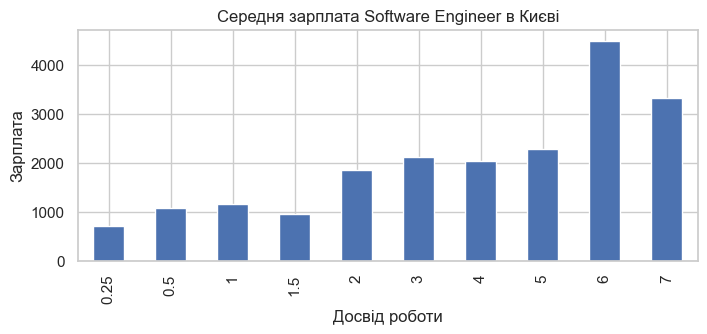

In [20]:
plot_data4 = python_data.query("Должность == 'Software Engineer' & Город == 'Киев'").\
                         groupby(by=["Общий.опыт.работы"])["Зарплата.в.месяц"].mean().round(0)
# plot_data4.drop(plot_data4.index  loc["10 и более лет"], inplace=True)
plot_data4.drop(labels = ["10 и более лет"], inplace=True) 
fig, ax = plt.subplots(figsize=(8, 3))
plot_data4.plot(kind="bar", ax=ax)
ax.set_title("Середня зарплата Software Engineer в Києві")
ax.set_ylabel("Зарплата")
ax.set_xlabel("Досвід роботи");